1. 组件
==================
***

* *DataAPI*

提供部门内部数据的访问能力，如果开发基于部门数据库(datacenter)的策略需要该模块。

* *Finance-Python*

主要提供与金融数据相关的计算功能。

* *AlgoTrading*

基于事件循环的回测引擎。

* *VisualPortfolio*

策略回测结果的可视化展现。可以单独使用。

以上所有的项目都可以在 ``svn`` 中找到，并且 直接通过项目根目录的下的 ``setup.py`` 文件安装：

```python
    python setup.py install
```

2. 流程
=================
***

<img src="img/流程图.png">

3. 如何回测一个策略
===================
***

3. 1 定义策略
----------------

在 ``AlgoTrading`` 下开发一个自己的策略，最值得关注的事情便是定义自己的 ``stratgy`` 对象，精简的 ``strategy`` 基类定义如下：

```python

    class Strategy:
    
        def universe(self): # 返回当前所有订阅的行情代码（包括股票，期货，指数等）
        
        def tradableAssets(self): # 返回当前所有的可交易字长的代码（不包括指数）
        
        def current_datetime(self): # 返回当前bar的时间
        
        def secPos(self): # 返回当前所有持仓情况，是以证券代码为键的字典
        
        def order(self, symbol, direction, quantity): # 交易指定量的证券
        
        def order_to(self, symbol, direction, quantity): # 交易指定的证券至指定的量
        
        ...

```
这里为了不使篇幅过长，并没有列出所有的成员。所有的成员请参看源代码。


用户的策略，继承自这个基类，然后自定义需要的行为，一般来说看起来如下:

```python

    class UserStrategy(strategy):
    
        def __init__(self):
            ...
            
        def handle_data(self):
            ...

```

其中用户需要自定义的包括两部分：

* ``__init__``

初始化函数，在策略启动的时候运行，主要用于定义比如：

    1. 全局变量
    2. 指标（由Finance-Python模块提供）
    
* ``handle_data``

行情数据处理函数，每根bar推送至回测引擎时候出发。这里是用户交易逻辑的主要定义点。

3.2 回测
--------------

当策略就绪之后，直接使用 ``strategyRunner`` 进行回测：

```python

    strategyRunner(strategy=UserStrategy, ...)

```

在 ``strategyRunner`` 中需要补充下面几个必填参数：

1. ``symbolList``

    用户关注的行情数据代码，是一个字符串类型的数组（现阶段可以包括，股票、期货以及指数）
    
2. ``startDate``

    回测周期开始时间，是 ``python`` 的 ``datetiem`` 类型对象。
    
3. ``endDate``

    回测周期结束时间，是 ``python`` 的 ``datetiem`` 类型对象。

4. ``dataSource``

    数据源，默认值为：``DataSource.DXDataCenter``，意味着使用部门的 ``datacenter`` 数据库。
    

一个典型的  ``strategyRunner`` 调用如下形式：

```python

    strategyRunner(strategy=UserStrategy,
                   symbolList=['600000.xshg', '000300.zicn', 'if1512'],
                   startDate=dt.datetime(2012, 1, 1),
                   endDate=dt.datetiem(2015, 11, 19))
```

4. ``Hello World``
=====================
***

一个最精简的展示完整功能的例子：

[*Hello World*](Hello World策略.ipynb)

5. 混合品种策略
=======================
***

一个多品种的混合策略：

[*混合品种策略*](混合品种策略.ipynb)

6. 更多。。。 
======================
***

* **一些方便的常用函数**

    例如： ``PyFin.api`` 下的：

    * ``nthWeekDay``
        
    * ``adjustDateByCalendar``
        
    * ``advanceDateByCalendar``
        
    * ``isBizDay``
    
        

* **数据保存**

    用户可以在 ``strategyRunner`` 中设置 ``saveFile=True`` 将表现数据保存为本地文件；
    
    
* **用户自定义信息记录**

    用户可以使用 ``strategy`` 的成员 ``info`` 函数记录任何想记录的信息；
    
    
* **获取表现数据**
    
    ``strategyRunner`` 会返回所有的表现数据，格式为 ``pandas.DataFrame``；
    
    
* **可以直接使用绘图工具**

    基本上，如果有一个类似于价格的序列（例如某个资产的历史价格序列，或者一个组合的净值曲线），我们就可以绘制基本的表现图：

In [20]:
%matplotlib inline
from DataAPI import api
from VisualPortfolio import createPerformanceTearSheet

In [21]:
data = api.GetEquityBarEOD('600000', '2012-01-01', '2015-10-01')

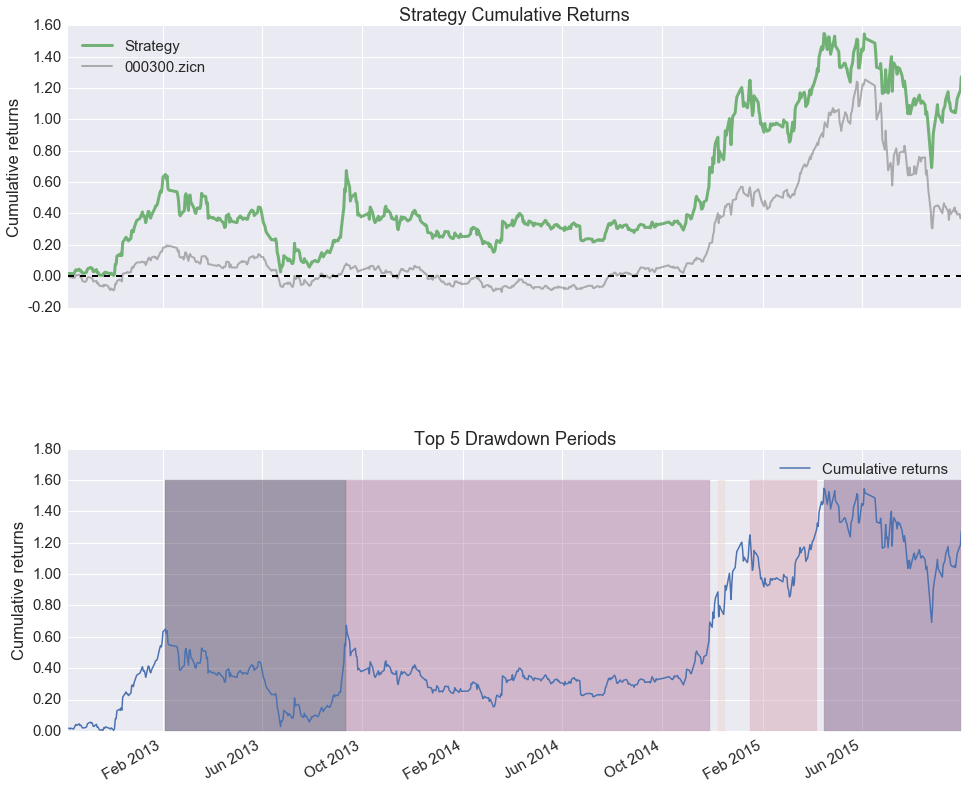

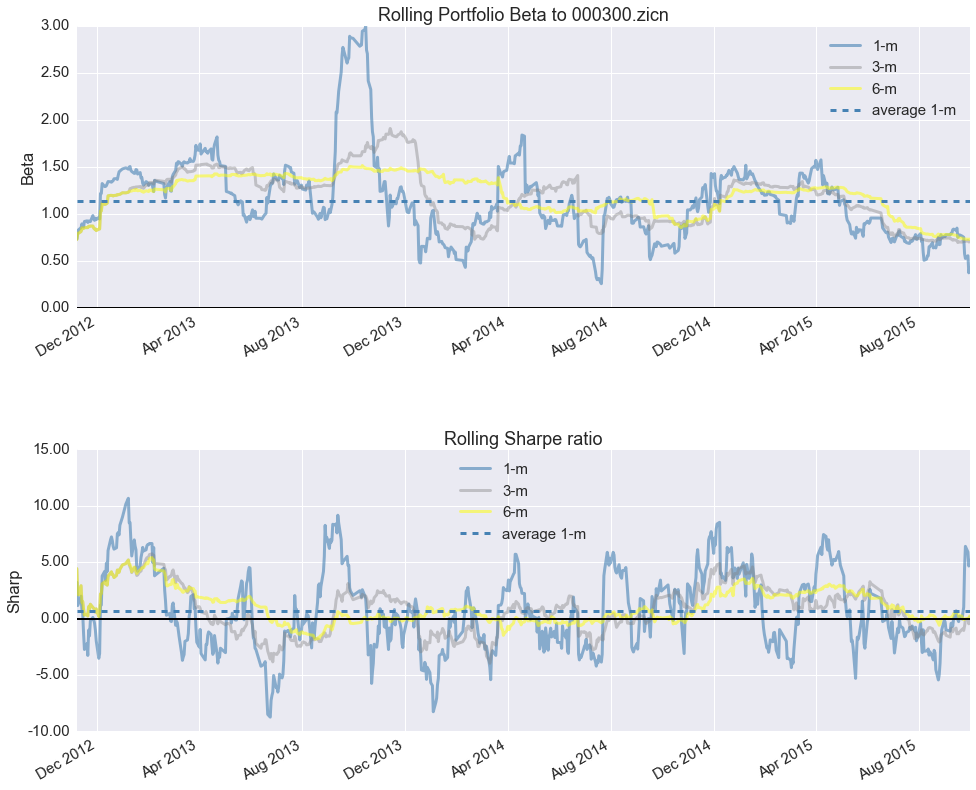

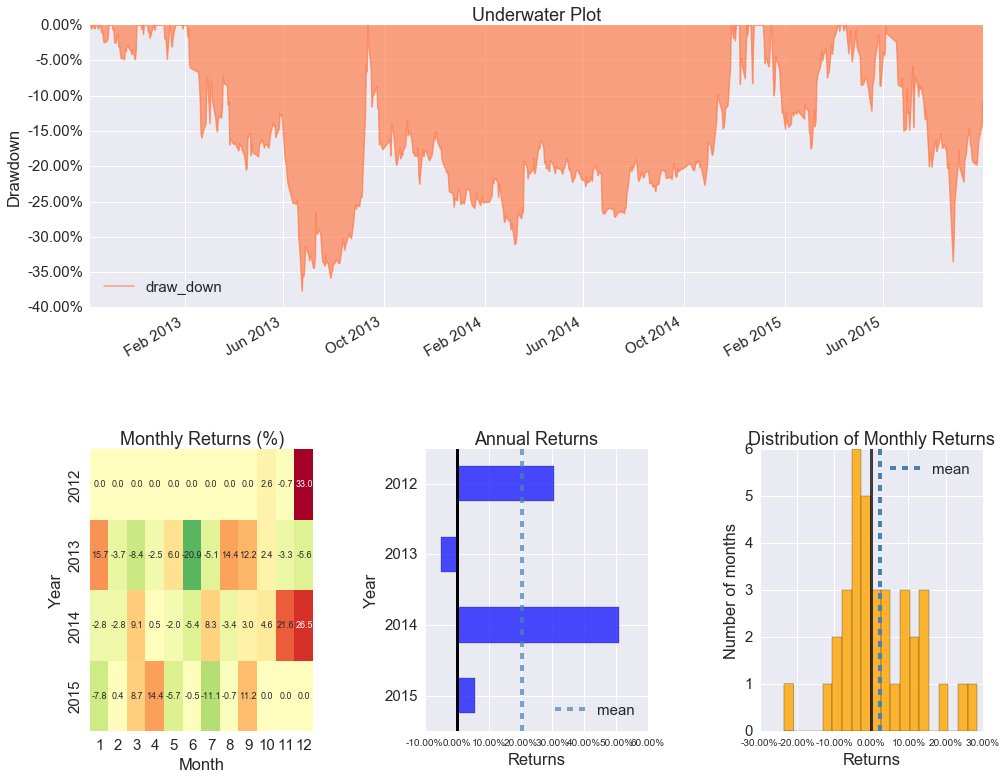

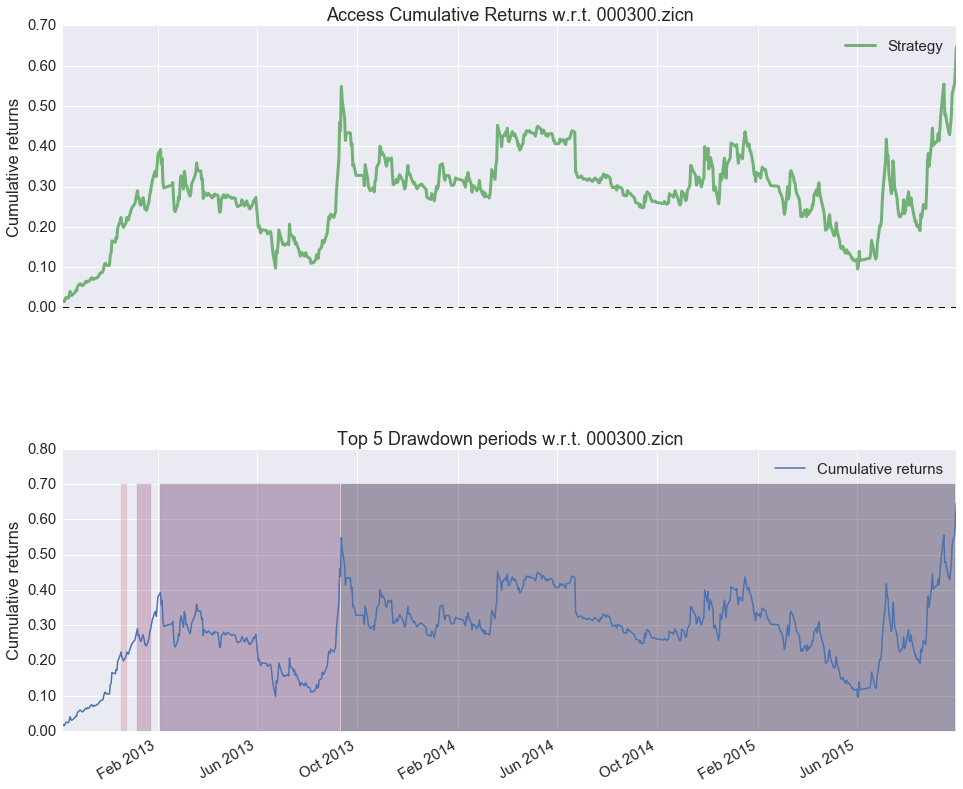

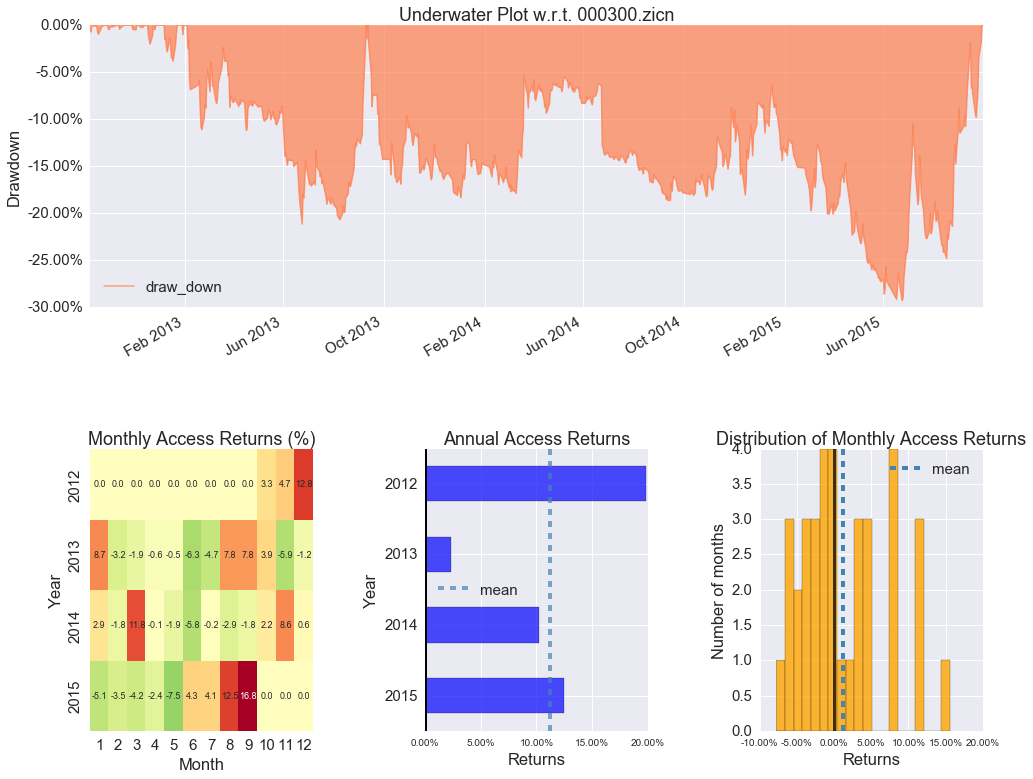

In [22]:
res = createPerformanceTearSheet(data['closePrice'], benchmark='000300.zicn')

7. 未来。。。
=====================
***

* **轻量级的 ``signal`` 类型**

    现在的 ``strategy`` 类型是一个比较重的概念，包含了所信号产生到发出交易指令的全部过程。当前正在开发一个轻量级的 ``signal`` 类型，可以视作是一种特殊的 ``strategy``，会分离指令产生的细节。
    
    
* **基于 ``signal`` 的运算框架**

    不同于 ``strategy`` 的概念， ``signal``   是一个更抽象的概念。在这一基础上，``signal``可以被组合，例如：相加、相减、回归，组合等运算。
    

* **基于 ``signal`` 的信号组合优化模型**

    如果上面的框架可以设计成功，那么我们就可以提出关于 ``signal`` 如何进行组合的最优化问题。
    
    
* **绘图工具的提升**

    现阶段的绘图包是回测后处理流程。这样的设计对于回测时合适的，但是并不适用于实时环境（例如，paper trading或者实盘阶段）。未来的目标是使得实时绘图成为可能。这个可能需要重新设计 ``AlogTrading`` 于 ``VisualPortfolio`` 的相互关系。